In [20]:
import pandas as pd
from sklearn.feature_selection import mutual_info_classif
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import roc_auc_score, average_precision_score, classification_report
from xgboost import XGBClassifier



In [7]:
# Read the Excel file
df = pd.read_csv("Loan_Data/cleaned_and_normalized_data.csv")
X=df.drop(columns='Default_status',axis=1)
y=df['Default_status']





In [8]:
X.info(),y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 827 entries, 0 to 826
Data columns (total 39 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   sector_AGRICULTURE                                827 non-null    float64
 1   sector_EDUCATION                                  827 non-null    float64
 2   sector_GENERAL                                    827 non-null    float64
 3   sector_GENERAL COMMERCE                           827 non-null    float64
 4   sector_VALUE CHAIN                                827 non-null    float64
 5   PRODUCT_GROUP_NAME_Corporate Loans Group          827 non-null    float64
 6   PRODUCT_GROUP_NAME_Current Accounts Group         827 non-null    float64
 7   PRODUCT_GROUP_NAME_HRM Loans Group                827 non-null    float64
 8   PRODUCT_GROUP_NAME_Retail Loans Individual Group  827 non-null    float64
 9   PRODUCT_GROUP_NAME_Sm

(None, None)

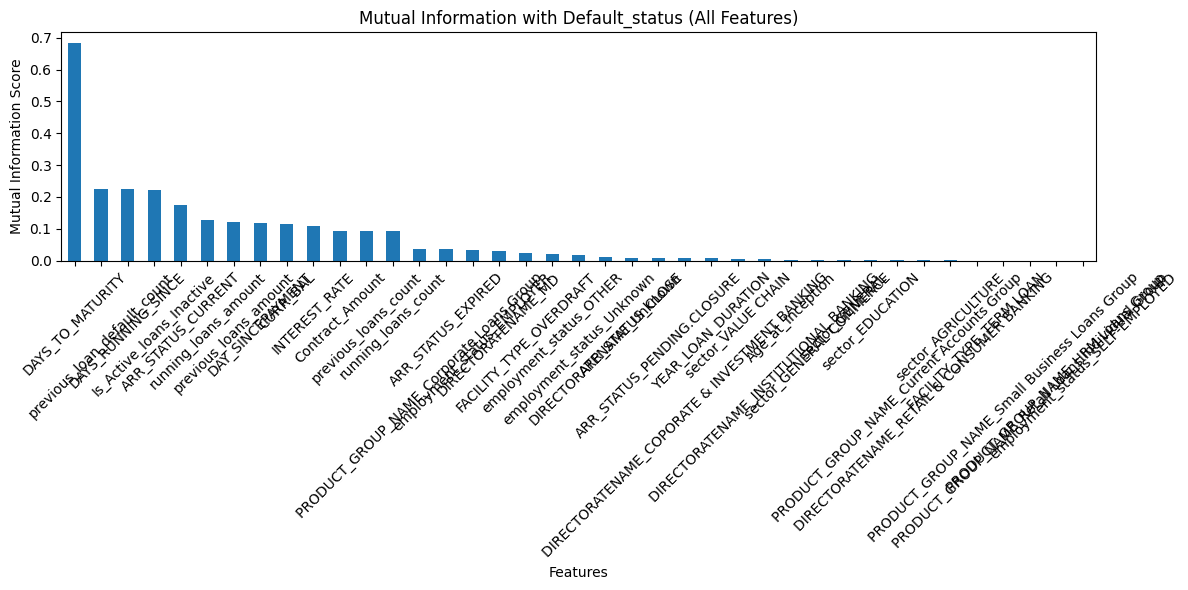

In [9]:
# Mutual Information
mi = mutual_info_classif(X, y)
mi_series = pd.Series(mi, index=X.columns).sort_values(ascending=False)

# Plot Mutual Information
plt.figure(figsize=(12, 6))
mi_series.plot(kind="bar")
plt.title("Mutual Information with Default_status (All Features)")
plt.xlabel("Features")
plt.ylabel("Mutual Information Score")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



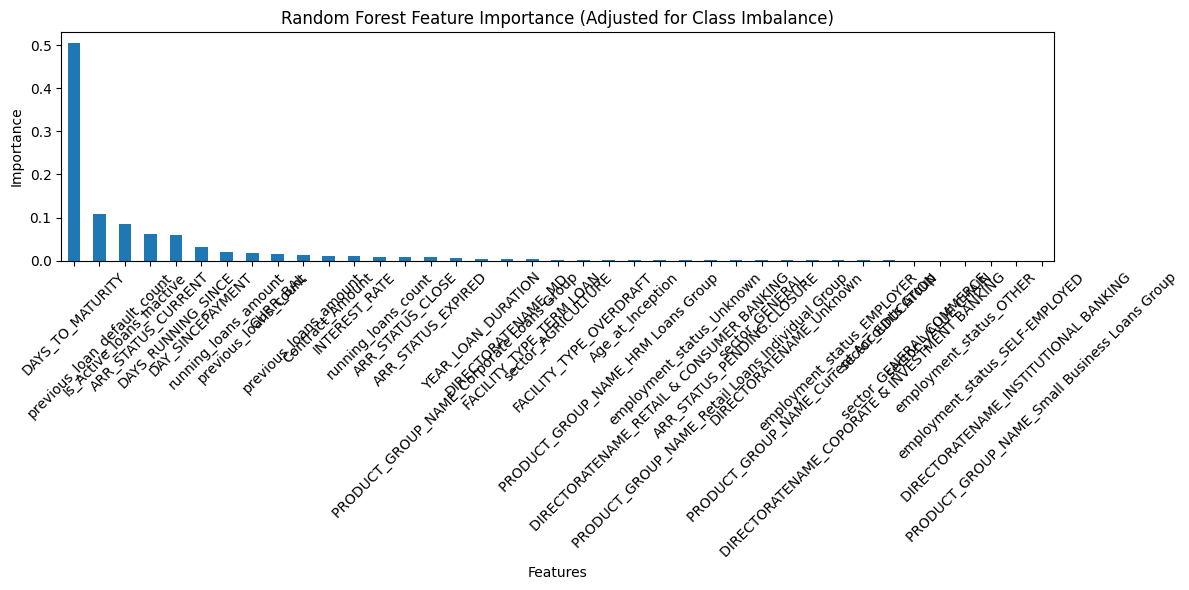

In [10]:

# Random Forest Feature Importance - HANDLING IMBALANCE
rf = RandomForestClassifier(random_state=42, class_weight='balanced', n_estimators=100) # Key change here
rf.fit(X, y)
importances = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)

# Plot Random Forest Importance
plt.figure(figsize=(12, 6))
importances.plot(kind="bar")
plt.title("Random Forest Feature Importance (Adjusted for Class Imbalance)")
plt.xlabel("Features")
plt.ylabel("Importance")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



In [11]:
# Compare the top features from both methods

mi_series.head(20),



(DAYS_TO_MATURITY                            0.683010
 previous_loan_default_count                 0.226568
 DAYS_RUNNING_SINCE                          0.224933
 Is_Active_loans_Inactive                    0.220718
 ARR_STATUS_CURRENT                          0.174338
 running_loans_amount                        0.126236
 previous_loans_amount                       0.120377
 DAY_SINCEPAYMENT                            0.118276
 CURR_BAL                                    0.114379
 INTEREST_RATE                               0.107531
 Contract_Amount                             0.094268
 previous_loans_count                        0.091796
 running_loans_count                         0.091744
 PRODUCT_GROUP_NAME_Corporate Loans Group    0.036475
 ARR_STATUS_EXPIRED                          0.036094
 employment_status_EMPLOYER                  0.034110
 DIRECTORATENAME_MD                          0.029933
 FACILITY_TYPE_OVERDRAFT                     0.022905
 employment_status_OTHER    

In [12]:

importances.head(20)

DAYS_TO_MATURITY                            0.504644
previous_loan_default_count                 0.108420
Is_Active_loans_Inactive                    0.085799
ARR_STATUS_CURRENT                          0.061124
DAYS_RUNNING_SINCE                          0.060493
DAY_SINCEPAYMENT                            0.032624
running_loans_amount                        0.020042
previous_loans_count                        0.017857
CURR_BAL                                    0.016135
previous_loans_amount                       0.013072
Contract_Amount                             0.010238
INTEREST_RATE                               0.009763
running_loans_count                         0.008898
ARR_STATUS_CLOSE                            0.008491
ARR_STATUS_EXPIRED                          0.008207
PRODUCT_GROUP_NAME_Corporate Loans Group    0.006324
YEAR_LOAN_DURATION                          0.004022
DIRECTORATENAME_MD                          0.003127
FACILITY_TYPE_TERM LOAN                     0.

In [13]:
#The top 15 MI features and top 15 features for random forest were shuffle to give the 17 features as listed

listed_features=['DAYS_TO_MATURITY', 'DAYS_RUNNING_SINCE', 'previous_loan_default_count', 'Is_Active_loans_Inactive', 'ARR_STATUS_CURRENT', 'running_loans_amount', 'DAY_SINCEPAYMENT', 'CURR_BAL', 'previous_loans_amount', 'INTEREST_RATE', 'running_loans_count', 'Contract_Amount', 'previous_loans_count', 'ARR_STATUS_CLOSE', 'ARR_STATUS_EXPIRED', 'sector_GENERAL', 'DIRECTORATENAME_RETAIL & CONSUMER BANKING']

In [14]:
listed_features

['DAYS_TO_MATURITY',
 'DAYS_RUNNING_SINCE',
 'previous_loan_default_count',
 'Is_Active_loans_Inactive',
 'ARR_STATUS_CURRENT',
 'running_loans_amount',
 'DAY_SINCEPAYMENT',
 'CURR_BAL',
 'previous_loans_amount',
 'INTEREST_RATE',
 'running_loans_count',
 'Contract_Amount',
 'previous_loans_count',
 'ARR_STATUS_CLOSE',
 'ARR_STATUS_EXPIRED',
 'sector_GENERAL',
 'DIRECTORATENAME_RETAIL & CONSUMER BANKING']


Correlation Matrix for Loan Amounts Group:
                        running_loans_amount  previous_loans_amount  \
running_loans_amount               1.000000              -0.220855   
previous_loans_amount             -0.220855               1.000000   
Contract_Amount                    0.091942               0.416380   
CURR_BAL                           0.184549               0.278057   

                       Contract_Amount  CURR_BAL  
running_loans_amount          0.091942  0.184549  
previous_loans_amount         0.416380  0.278057  
Contract_Amount               1.000000  0.726757  
CURR_BAL                      0.726757  1.000000  


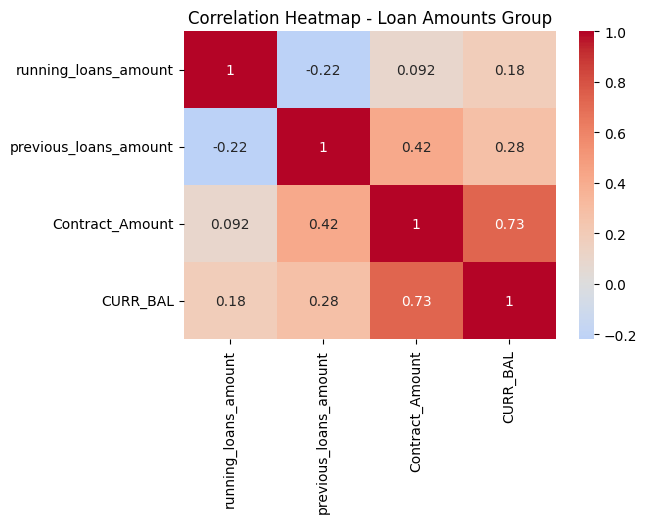


Correlation Matrix for Loan Counts Group:
                       running_loans_count  previous_loans_count
running_loans_count              1.000000             -0.080475
previous_loans_count            -0.080475              1.000000


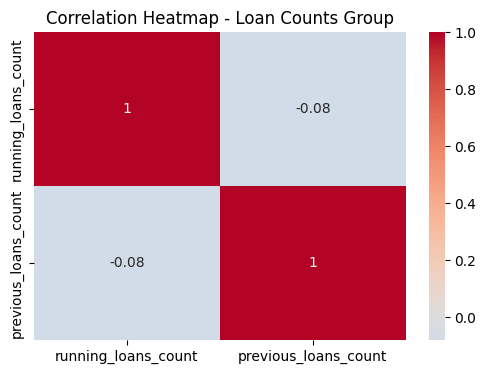


Correlation Matrix for Status Flags Group:
                     ARR_STATUS_CURRENT  ARR_STATUS_CLOSE  ARR_STATUS_EXPIRED
ARR_STATUS_CURRENT            1.000000         -0.583296           -0.236797
ARR_STATUS_CLOSE             -0.583296          1.000000           -0.385856
ARR_STATUS_EXPIRED           -0.236797         -0.385856            1.000000


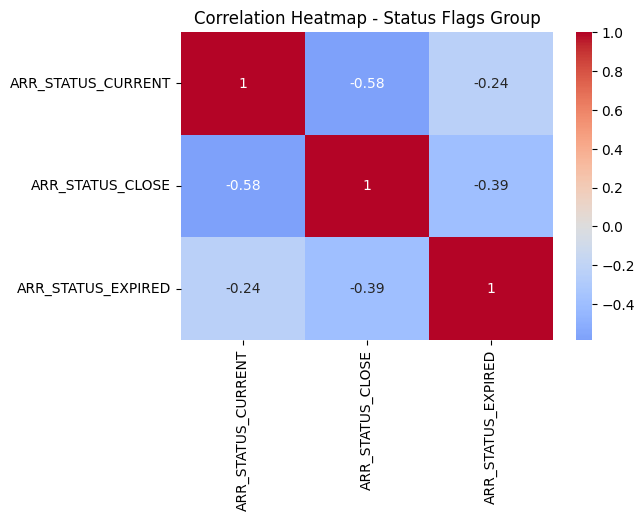


Correlation Matrix for Temporal Features Group:
                     DAYS_TO_MATURITY  DAYS_RUNNING_SINCE  DAY_SINCEPAYMENT  \
DAYS_TO_MATURITY            1.000000           -0.314596         -0.382137   
DAYS_RUNNING_SINCE         -0.314596            1.000000          0.356592   
DAY_SINCEPAYMENT           -0.382137            0.356592          1.000000   
YEAR_LOAN_DURATION          0.496019            0.639006          0.040026   

                    YEAR_LOAN_DURATION  
DAYS_TO_MATURITY              0.496019  
DAYS_RUNNING_SINCE            0.639006  
DAY_SINCEPAYMENT              0.040026  
YEAR_LOAN_DURATION            1.000000  


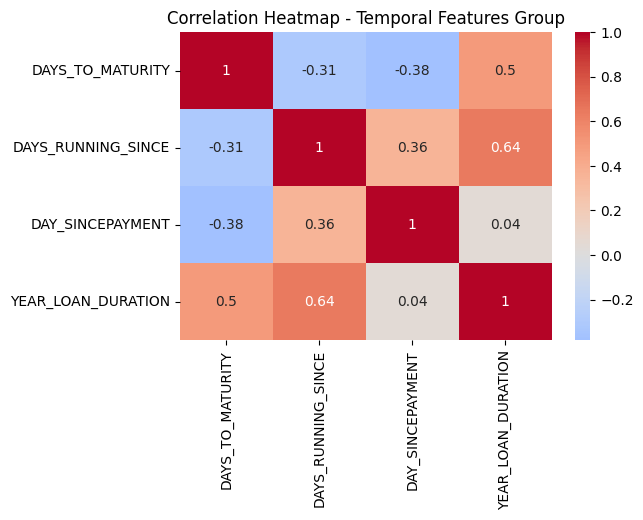

In [15]:
#features were grouped and checked for correlation to check for multicolinearity
#Loan Amounts Group: running_loans_amount, previous_loans_amount, Contract_Amount, CURR_BAL.
#Loan Counts Group: running_loans_count, previous_loans_count.
#Status Flags: ARR_STATUS_CURRENT, ARR_STATUS_CLOSE, ARR_STATUS_EXPIRED 
#These are one-hot encoded from the same variable, so they are inherently negatively correlated. 
#Temporal Features: DAYS_TO_MATURITY, DAYS_RUNNING_SINCE, DAY_SINCEPAYMENT, YEAR_LOAN_DURATION.
#  These all measure time but in different contexts.


# Define groups
loan_amounts_group = ["running_loans_amount", "previous_loans_amount", "Contract_Amount", "CURR_BAL"]
loan_counts_group = ["running_loans_count", "previous_loans_count"]
status_flags_group = ["ARR_STATUS_CURRENT", "ARR_STATUS_CLOSE", "ARR_STATUS_EXPIRED"]
temporal_group = ["DAYS_TO_MATURITY", "DAYS_RUNNING_SINCE", "DAY_SINCEPAYMENT", "YEAR_LOAN_DURATION"]

groups = {
    "Loan Amounts Group": loan_amounts_group,
    "Loan Counts Group": loan_counts_group,
    "Status Flags Group": status_flags_group,
    "Temporal Features Group": temporal_group
}

selected_features = {}

for group_name, features in groups.items():
    corr = X[features].corr()
    print(f"\nCorrelation Matrix for {group_name}:\n", corr)
    
    # Plot heatmap
    plt.figure(figsize=(6,4))
    sns.heatmap(corr, annot=True, cmap="coolwarm", center=0)
    plt.title(f"Correlation Heatmap - {group_name}")
    plt.show()
    
   


In [21]:
#Feature selections
#Loan Amounts Group:CURR_BAL is the most actionable and such selected, others discarded to avoid redundancy
#Loan Counts Group:previous_loans_count has a significantly higher rank in the Balanced RF, 
# customer's past borrowing behavior is a strong signal.
#Status Flags Group:This is a one-hot encoded group. 
# The most important one is ARR_STATUS_CURRENT. If a loan is not current, it's either closed, expired, or pending.
#Temporal Features Group:KEEP ALL THREE. They are not redundant; they measure fundamentally different things:
# DAYS_TO_MATURITY: How long until the loan ends. (Risk profile changes over time).
# DAY_SINCEPAYMENT: The most direct measure of delinquency. Extremely actionable.
# DAYS_RUNNING_SINCE: The age of the loan. (New loans might be riskier).

#Three sets created for validation purpose prior to model training
#set_a exclusive chosen with 7 features based on predictive power
#set_b created with addition of three additional features based on business relevance
#set_c, minimal top 5 features selected for simplicicy and robustness


set_a = ['DAYS_TO_MATURITY', 'previous_loan_default_count', 'Is_Active_loans_Inactive',
         'ARR_STATUS_CURRENT', 'DAY_SINCEPAYMENT', 'CURR_BAL', 'DAYS_RUNNING_SINCE']

set_b = set_a + ['previous_loans_count', 'INTEREST_RATE', 'sector_GENERAL']
set_c = ['DAYS_TO_MATURITY', 'previous_loan_default_count', 'ARR_STATUS_CURRENT', 'DAY_SINCEPAYMENT', 'CURR_BAL']

xgb_model = XGBClassifier()
xgb_model.fit(X, y)


for i, feature_set in enumerate([set_a, set_b, set_c], 1):
    X_subset = X[feature_set]
    
    # Get cross-validated predictions
    y_proba = cross_val_predict(xgb_model, X_subset, y, cv=5, method='predict_proba')[:, 1]
    
    # Calculate metrics
    roc_auc = roc_auc_score(y, y_proba)
    pr_auc = average_precision_score(y, y_proba) # KEY METRIC FOR IMBALANCED DATA
    
    print(f"Set {i} ({len(feature_set)} features) | ROC-AUC: {roc_auc:.4f}, PR-AUC: {pr_auc:.4f}")

Set 1 (7 features) | ROC-AUC: 1.0000, PR-AUC: 1.0000
Set 2 (10 features) | ROC-AUC: 1.0000, PR-AUC: 1.0000
Set 3 (5 features) | ROC-AUC: 1.0000, PR-AUC: 1.0000


In [ ]:
#All three features perform the same, the choice of set_b with 10 features is because it captures 
# important business description for segmentation purpose, the EDA file generates model data based on
# selected features set_b
df_selected=X[set_b]
df_combined = pd.concat([df_selected,y], axis=1)

# Save the concatenated DataFrame to a CSV file for model training
df_combined.to_csv('Loan_Data/model_selected_data.csv', index=False)